In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt

nombre_archivo = DATOS_DIR + 'Hawks.csv'

with open(nombre_archivo, 'rb') as  f:
    result = chardet.detect(f.read())

df = pd.read_csv(nombre_archivo, encoding=result["encoding"])
display(df)

,Year,Species,Wing,Weight,Tail,Hallux,Coopers?,Red-tailed?,Sharp-shinned?
0,1992,RT,385.0,920.0,219,30.1,0,1,0
1,1992,RT,381.0,990.0,235,31.3,0,1,0
2,1992,CH,265.0,470.0,220,23.5,1,0,0
3,1992,RT,370.0,960.0,212,30.1,0,1,0
4,1992,RT,405.0,1120.0,238,30.2,0,1,0
...,...,...,...,...,...,...,...,...,...
442,2003,RT,362.0,840.0,206,26.1,0,1,0
443,2003,SS,190.0,200.0,157,15.0,0,0,1
444,2003,SS,197.0,185.0,157,15.6,0,0,1
445,2003,RT,360.0,1325.0,224,30.6,0,1,0


*Grafico*

Species
RT    286
SS    129
CH     32
Name: count, dtype: int64


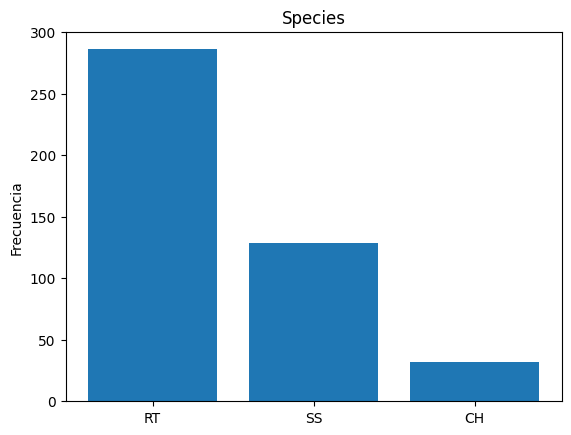

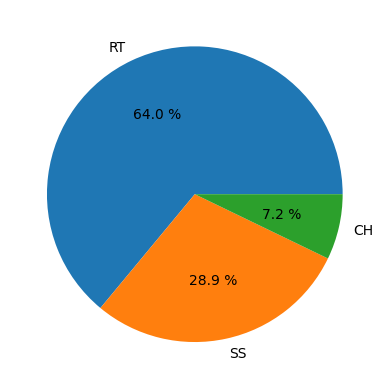

In [3]:
target = "Species"
barras = df[target].value_counts()
print(barras)

plt.figure()
N = len(barras)
plt.bar(np.arange(N), barras)
plt.title(target)      # Colocamos el título
plt.ylabel("Frecuencia")
plt.xticks(np.arange(N), barras.index)
plt.show()

plt.pie(barras,labels=barras.index, autopct="%0.1f %%")
plt.show()

**Calculo Correlacion Lineal**

In [5]:
correlacion = df["Wing"].corr(df["Tail"])
correlacion


0.9117653735851496

La correlación de **0.9118** entre los atributos **Ala** y **Cola** es una medida de cuán fuertemente están relacionados linealmente estos dos atributos.

### Interpretación de la Correlación:

1. **Valor de la Correlación**: 
   - El valor de **0.9118** está muy cerca de 1, lo que indica una **correlación muy fuerte**.

2. **Intensidad**: 
   - Dado que el valor está entre **0.7 y 1**, se considera que la intensidad de la correlación es **fuerte**.

3. **Tipo**:
   - El signo positivo (+0.9118) indica que la correlación es **positiva**. Esto significa que a medida que el valor de un atributo aumenta, el otro tiende a aumentar también.

### Respuesta a la pregunta a:

- **Valor**: 0.9118
- **Intensidad**: Fuerte
- **Tipo**: Positiva

Por lo tanto, hay una correlación fuerte y positiva entre los atributos **Ala** y **Cola** en los datos de los gavilanes.

**B)**

In [50]:
# Ajustar la configuración para mostrar números en formato decimal
pd.options.display.float_format = '{:.6f}'.format

hallux_sin_normalizar = df["Hallux"].describe()

hallux_normalizado = ((df["Hallux"] - df["Hallux"].mean()) / df["Hallux"].std()).describe()

tabla = pd.DataFrame({
    "Sin Normalizar": hallux_sin_normalizar,
    "Normalizado": hallux_normalizado
})

display(tabla)



,Sin Normalizar,Normalizado
count,447.000000,447.000000
mean,25.799441,0.000000
std,10.601582,1.000000
min,9.600000,-1.528021
25%,15.150000,-1.004514
50%,29.500000,0.349057
75%,31.500000,0.537708
max,130.000000,9.828774


### Valores importantes para la comparación:
- **Media (sin normalizar)**: 25.799441
- **Mediana (Q2, sin normalizar)**: 29.500000
- **Desviación estándar (sin normalizar)**: 10.601582
- **Máximo (sin normalizar)**: 130.000000

### Resultados después de la normalización:
- **Q2 (Mediana, normalizada)**: Aproximadamente 0.349057
- **Máximo (normalizado)**: Aproximadamente 9.828774

### Afirmaciones:

#### I. **El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos.**
   - **Valor normalizado de Q2 (Mediana):** Aproximadamente 0.349057.
   - **Interpretación:** Dado que el valor normalizado de la mediana (Q2) no es 0, esto indica que hay una diferencia entre la media y la mediana en los datos originales. Sin embargo, el valor está relativamente cerca de 0, lo que sugiere que la media y la mediana no están muy lejos, pero no son iguales.
   - **Conclusión:** **Falso**. Aunque están relativamente cerca, no se puede afirmar que son "cercanos" en el sentido de igualdad.

#### II. **El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.**
   - **Máximo (normalizado):** Aproximadamente 9.828774.
   - **Interpretación:** El valor normalizado del máximo es de aproximadamente 9.83, lo que significa que el valor máximo de `Hallux` está un poco más de 9 desviaciones estándar por encima de la media.
   - **Conclusión:** **Verdadero**.

#### III. **Un hallux que mida más de 600 mm es considerado atípico extremo.**
   - **Interpretación:** El máximo valor registrado en la data es de 130 mm, que es mucho menor que 600 mm. Un hallux de 600 mm sería extremadamente inusual en este contexto.
   - **Conclusión:** **Verdadero**.

#### IV. **Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.**
   - **Interpretación:** En un conjunto de datos normalizados (con media 0 y desviación estándar 1), un valor de 2 está 2 desviaciones estándar por encima de la media. En una distribución normal, esto no se considera un valor extremo, ya que cubre aproximadamente el 95% de los datos.
   - **Conclusión:** **Falso**. Un valor normalizado de 2 no se considera atípico extremo.

#### V. **En un gavilán es atípico que su hallux mida menos de 100 mm.**
   - **Interpretación:** El mínimo valor registrado es de 9.6 mm, lo que sugiere que muchos gavilanes tienen un hallux considerablemente menor que 100 mm. Por lo tanto, un hallux de menos de 100 mm no sería atípico, sino más bien común.
   - **Conclusión:** **Falso**. Un hallux de menos de 100 mm no es atípico en estos datos.

### Resumen de las respuestas:
1. **I.** Falso
2. **II.** Verdadero
3. **III.** Verdadero
4. **IV.** Falso
5. **V.** Falso
